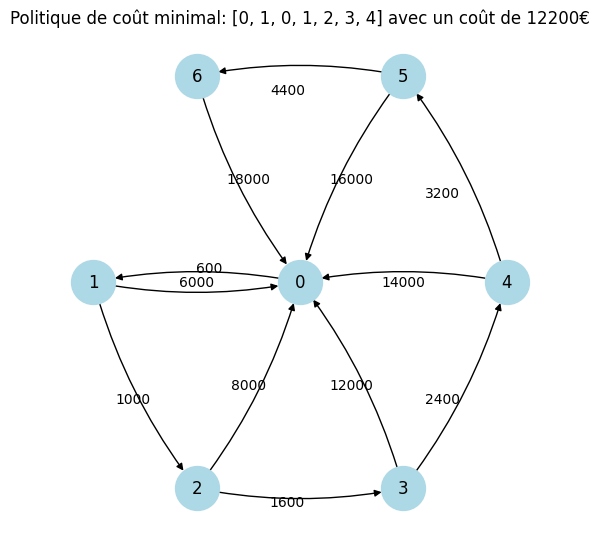

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from queue import Queue

# Coûts et valeurs
achat = 20000
ages = [0, 1, 2, 3, 4, 5, 6]
revente = [0, 14000, 12000, 8000, 6000, 4000, 2000]
entretien = [0, 600, 1000, 1600, 2400, 3200, 4400]
n = 6   # Remplacer 6 par le nombre d'arêtes/d'années souhaité

# Créer le graphe
G = nx.DiGraph()

# Ajouter les nœuds
for age in ages:
    G.add_node(age)

# Ajouter les arêtes d'entretien (pour avancer d'une année)
for i in range(len(ages) - 1):
    G.add_edge(ages[i], ages[i + 1], weight=entretien[i + 1])

# Ajouter les arêtes de revente (pour retourner à l'année 0)
for i, age in enumerate(ages[1:], 1):
    G.add_edge(age, 0, weight=achat - revente[i])

# Position des nœuds
shell_pos = [[0], [1, 2, 3, 4, 5, 6]]

# Afficher le graphe
plt.figure(figsize=(5, 5))
pos = nx.shell_layout(G, shell_pos)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', connectionstyle="arc3,rad=0.1")

# Affichage des étiquettes des arêtes
labels = nx.get_edge_attributes(G, 'weight')
for label_pos, label in labels.items():
    start, end = label_pos
    # Calcul d'un décalage pour la position des étiquettes, surtout pour les arêtes multiples
    offset = (0.03 if start == 0 else -0.03) if end - start == 1 else 0
    x = (pos[start][0] + pos[end][0]) / 2 + offset
    y = (pos[start][1] + pos[end][1]) / 2 + offset
    plt.text(x, y, str(label), horizontalalignment='center', verticalalignment='center')
    
    
# Chercher la politique de coût minimal

def trouver_chemin_n_arretes(G, noeud_depart, n):
    # File pour BFS: les éléments sont des tuples (noeud_courant, chemin_actuel, longueur_actuelle, poids_total)
    file = Queue()
    file.put((noeud_depart, [noeud_depart], 0, 0))

    # Garder une trace du chemin le plus court trouvé jusqu'à présent et de son poids
    chemin_le_plus_court = None
    poids_du_chemin_le_plus_court = float('inf')

    while not file.empty():
        noeud_courant, chemin, longueur, poids = file.get()

        # Si le chemin a n arêtes et que son poids est inférieur à celui que nous avons déjà trouvé
        if longueur == n:
            if poids < poids_du_chemin_le_plus_court:
                chemin_le_plus_court = chemin
                poids_du_chemin_le_plus_court = poids
            continue  # Continue pour trouver d'autres chemins possibles avec x arêtes

        # Parcourir les voisins du noeud courant
        for voisin in G.neighbors(noeud_courant):
            if longueur < n:
                # Obtenir le poids de l'arête
                poids_arrete = G[noeud_courant][voisin]['weight']
                # Ajouter le voisin dans la file avec un chemin, une longueur et un poids mis à jour
                file.put((voisin, chemin + [voisin], longueur + 1, poids + poids_arrete))

    # Retourne le chemin le plus court et son poids, ou None si aucun chemin de x arêtes n'existe
    return chemin_le_plus_court, poids_du_chemin_le_plus_court

chemin, poids = trouver_chemin_n_arretes(G, 0, n)

if chemin:
    plt.title(f"Politique de coût minimal: {chemin} avec un coût de {poids}€")
else:
    plt.title(f"Aucun chemin de {n} arêtes n'existe à partir de 0.")

plt.show()
